In [12]:
%matplotlib inline
import numpy as np
import scipy
import PIL
import matplotlib.pyplot as plt
import PIL.Image as im
from scipy import ndimage
from PIL import ImageEnhance

In [2]:
show = lambda img: plt.imshow(img)
gshow = lambda img: plt.imshow(img, cmap = plt.get_cmap('gray'))
rgb2gray = lambda rgb: np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [180]:
im = scipy.misc.imread('../test_large2.JPG',flatten=True)

In [156]:
im = scipy.misc.imread('../orig_0.JPG',flatten=True)

In [157]:
im

array([[  1.77199996,   1.77199996,   1.77199996, ...,  22.32699966,
         22.32699966,  22.32699966],
       [  1.77199996,   1.77199996,   2.77200007, ...,  22.32699966,
         22.32699966,  22.32699966],
       [  2.77200007,   2.77200007,   2.77200007, ...,  22.32699966,
         22.32699966,  22.32699966],
       ..., 
       [  4.        ,   5.        ,   6.        , ...,   6.        ,
          7.        ,   8.        ],
       [  4.        ,   5.        ,   6.        , ...,   6.        ,
          7.        ,   8.        ],
       [  4.        ,   5.        ,   6.        , ...,   6.        ,
          7.        ,   8.        ]], dtype=float32)

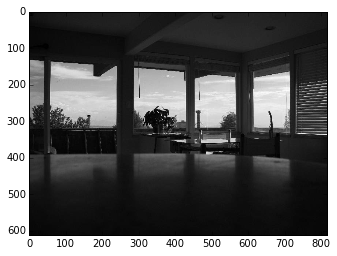

In [158]:
gshow(im)

In [16]:
im

<module 'PIL.Image' from '/Users/haosutang/anaconda/lib/python2.7/site-packages/PIL/Image.pyc'>

In [189]:
im_c = scipy.misc.imread('../test_large2.JPG')

In [190]:
im_im = PIL.Image.fromarray(im_c)

In [191]:
%%time
enhancer = ImageEnhance.Contrast(im_im)
im_2 = enhancer.enhance(1)

CPU times: user 154 ms, sys: 31.5 ms, total: 186 ms
Wall time: 197 ms


In [194]:
im_im.show()

In [195]:
im_2.show()

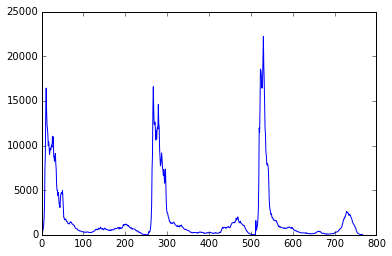

In [164]:
plt.plot(range(768), im_im.histogram())

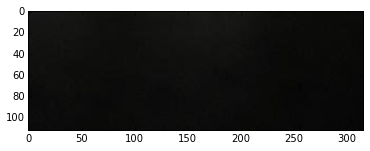

In [165]:
show(im_c[500:1000,500:1000])

In [83]:
im_2a = np.array(im.getdata()).reshape()

In [86]:
np.array(im_2.getdata()).shape

(19961856, 3)

In [82]:
show(im_2a[500:1000,500:1000])

IndexError: too many indices for array

In [72]:
len(im_im.histogram())

768

In [73]:
sum(im_im.histogram()[256:512])

19961856

In [ ]:
assert 

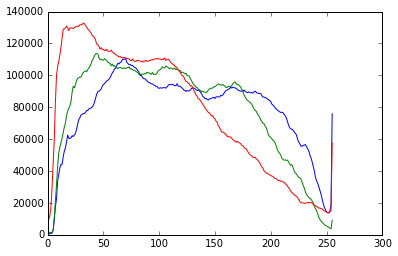

In [74]:
plt.plot(range(256),im_im.histogram()[:256])
plt.plot(range(256),im_im.histogram()[256:512])
plt.plot(range(256),im_im.histogram()[512:768])

### Histogram Equalization

In [181]:
im.shape

(3648, 5472)

In [182]:
def HE_serial(im_in):
    im = im_in.copy()
    histogram = [0]*256
    height, width = im.shape
    for i in im:
        for j in i:
            histogram[j] += 1
    histogram = np.array(histogram, dtype=float)/(width*height)
    cum_hist = np.cumsum(histogram)
    equal_hist = (cum_hist*256).astype(int)
    mapfunc = dict(zip(range(256), equal_hist))
    new_im = np.zeros_like(im)
    for i in range(height):
        for j in range(width):
            new_im[i,j] = mapfunc[im[i,j]]
    
    return new_im
    #plt.plot(range(0,256), cum_hist)

In [183]:
%%time
new_im = HE_serial(im.astype(int))

CPU times: user 11.7 s, sys: 218 ms, total: 11.9 s
Wall time: 12.1 s


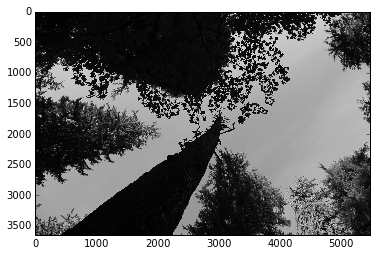

In [184]:
gshow(im)

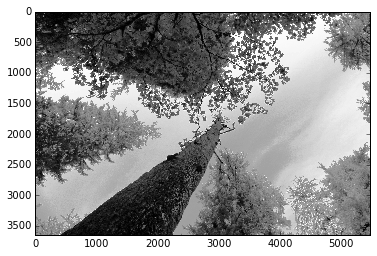

In [185]:
gshow(new_im)

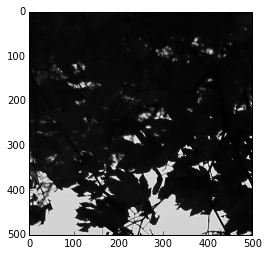

In [186]:
gshow(im[500:1000,500:1000])

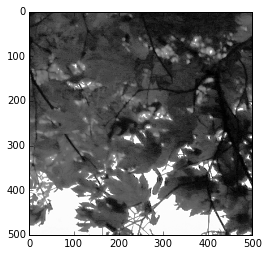

In [187]:
gshow(new_im[500:1000,500:1000])

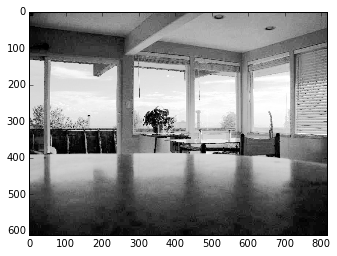

In [179]:
gshow(new_im)

In [137]:
def histogram(im):
    histogram = [0]*256
    height, width = im.shape
    for i in im:
        for j in i:
            if j>255:
                j=255
            histogram[j] += 1
    histogram = np.array(histogram, dtype=float)/(width*height)
    plt.bar(range(256), histogram)
    return histogram

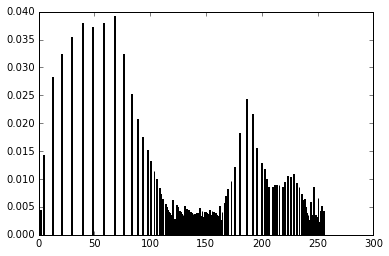

In [188]:
new_hist = histogram(new_im.astype(int))

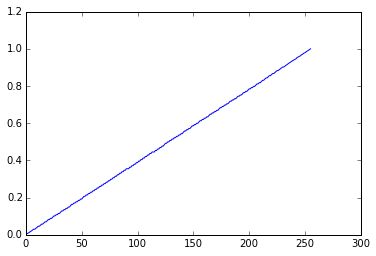

In [141]:
plt.plot(range(256), np.cumsum(new_hist))